In [58]:
#Task-02 --Perform data cleaning and exploratory data analysis (EDA) on a dataset of your choice, such as the Titanic dataset from 
#Kaggle. Explore the relationships between variables and identify patterns and trends in the data.

# I have taken TITANIC DATASET and perfomed all the operations
#Name-Pragya Saini

In [4]:
import tensorflow as tf
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.layers import Dense,LSTM
from tensorflow.keras.optimizers import Adam
import numpy as np



In [5]:
df = pd.read_csv(r"C:\Users\lenovo\Desktop\titanic\train.csv")

In [4]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
df.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [7]:
df.describe

<bound method NDFrame.describe of      PassengerId  Survived  Pclass  \
0              1         0       3   
1              2         1       1   
2              3         1       3   
3              4         1       1   
4              5         0       3   
..           ...       ...     ...   
886          887         0       2   
887          888         1       1   
888          889         0       3   
889          890         1       1   
890          891         0       3   

                                                  Name     Sex   Age  SibSp  \
0                              Braund, Mr. Owen Harris    male  22.0      1   
1    Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                               Heikkinen, Miss. Laina  female  26.0      0   
3         Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                             Allen, Mr. William Henry    male  35.0      0   
..                                 

In [8]:
print(df.isnull().sum())

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


In [22]:
df.dtypes

Survived      int64
Pclass        int64
Sex          object
Age         float64
SibSp         int64
Parch         int64
Fare        float64
Embarked     object
dtype: object

In [9]:
df = df.drop(['PassengerId', 'Name', 'Ticket', 'Cabin'], axis=1)

In [23]:
df = df.drop_duplicates()

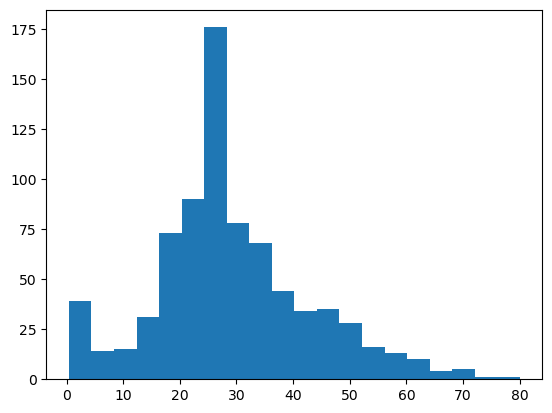

In [26]:
import matplotlib.pyplot as plt

plt.hist(df['Age'], bins=20)
plt.show()

In [20]:
df['Age'].fillna(df['Age'].median(), inplace=True)
df['Embarked'].fillna(df['Embarked'].mode()[0], inplace=True)
df['Fare'].fillna(df['Fare'].median(), inplace=True)

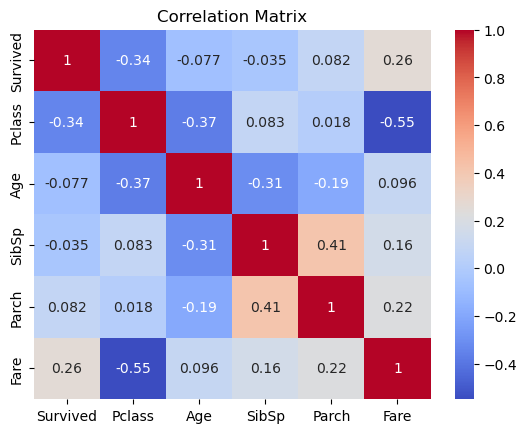

In [11]:
import seaborn as sns
correlation_matrix = df.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

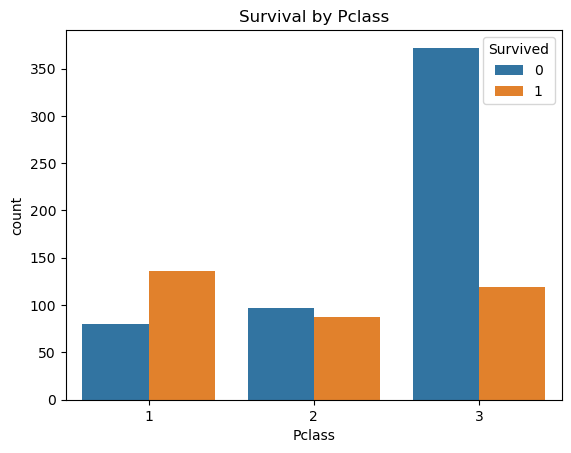

In [12]:
sns.countplot(x='Pclass', hue='Survived', data=df)
plt.title('Survival by Pclass')
plt.show()

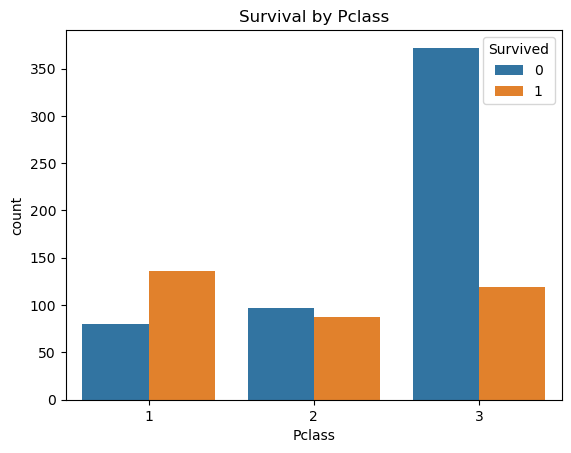

In [13]:
sns.countplot(x='Pclass', hue='Survived', data=df)
plt.title('Survival by Pclass')
plt.show()

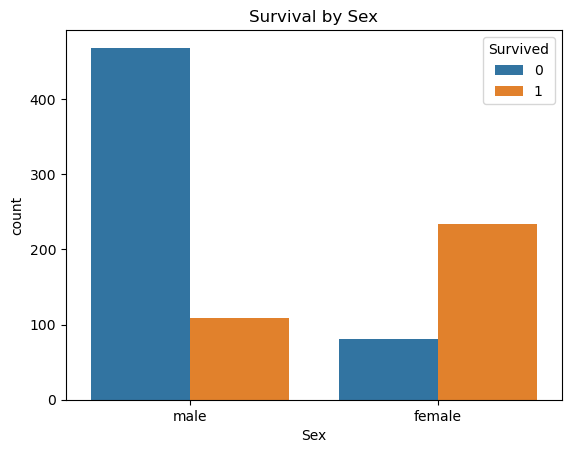

In [14]:
sns.countplot(x='Sex', hue='Survived', data=df)
plt.title('Survival by Sex')
plt.show()

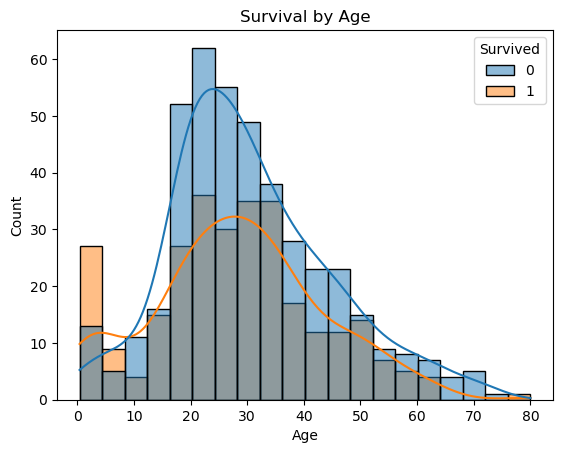

In [15]:
sns.histplot(x='Age', hue='Survived', data=df, kde=True)
plt.title('Survival by Age')
plt.show()

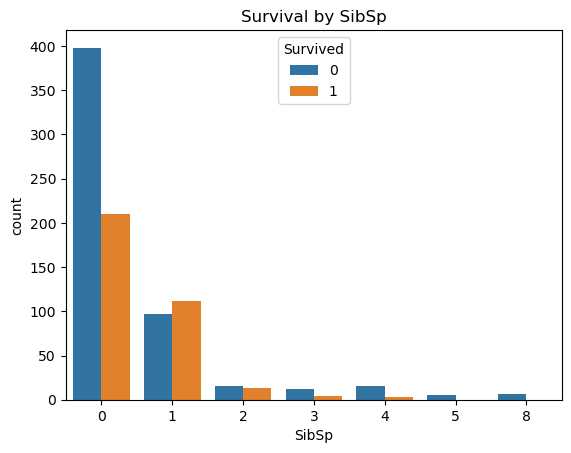

In [16]:
sns.countplot(x='SibSp', hue='Survived', data=df)
plt.title('Survival by SibSp')
plt.show()

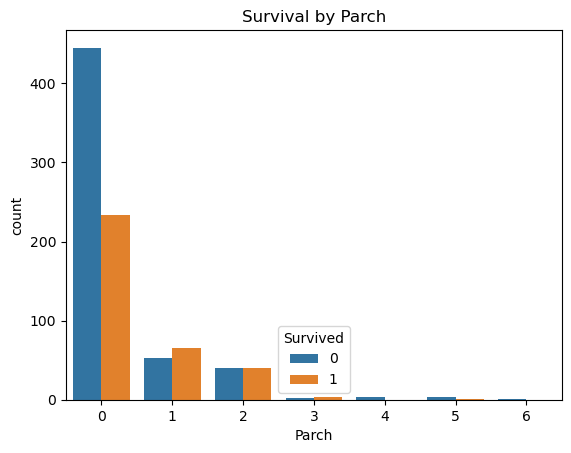

In [17]:
sns.countplot(x='Parch', hue='Survived', data=df)
plt.title('Survival by Parch')
plt.show()

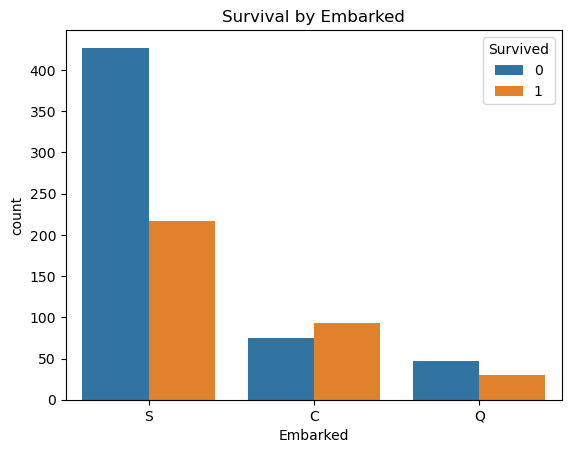

In [18]:
sns.countplot(x='Embarked', hue='Survived', data=df)
plt.title('Survival by Embarked')
plt.show()

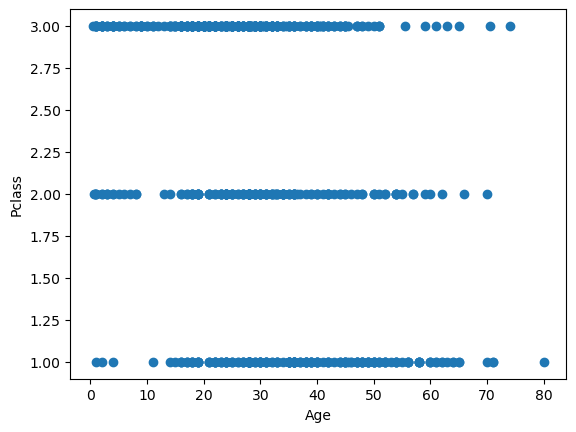

In [29]:
plt.scatter(df['Age'], df['Pclass'])
plt.xlabel('Age')
plt.ylabel('Pclass')
plt.show()


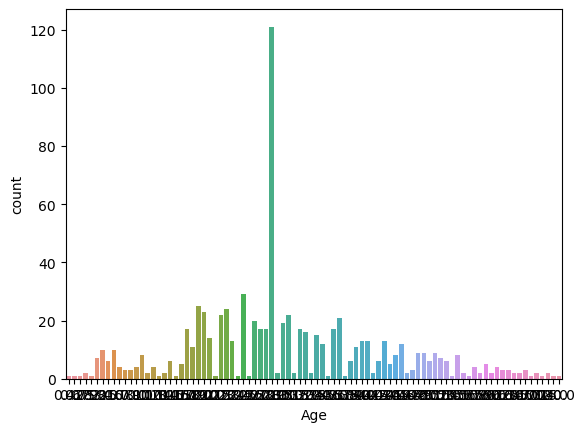

In [33]:
import seaborn as sns
sns.countplot(x='Age', data=df)
plt.show()


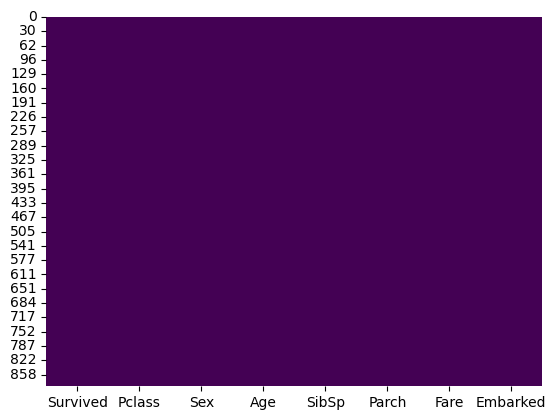

In [34]:
sns.heatmap(df.isnull(), cbar=False, cmap='viridis')
plt.show()


In [39]:
plt.savefig('visualization.png')

<Figure size 640x480 with 0 Axes>

In [43]:
correlation_matrix = df.corr()
print(correlation_matrix)


          Survived    Pclass       Age     SibSp     Parch      Fare
Survived  1.000000 -0.331388 -0.078114 -0.037841  0.069864  0.247159
Pclass   -0.331388  1.000000 -0.342745  0.087050  0.038998 -0.554649
Age      -0.078114 -0.342745  1.000000 -0.279316 -0.182697  0.092503
SibSp    -0.037841  0.087050 -0.279316  1.000000  0.379535  0.133807
Parch     0.069864  0.038998 -0.182697  0.379535  1.000000  0.190823
Fare      0.247159 -0.554649  0.092503  0.133807  0.190823  1.000000


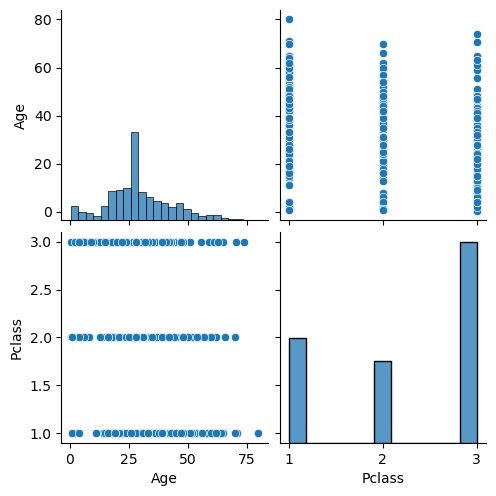

In [44]:
sns.pairplot(df[['Age', 'Pclass', 'Sex']])
plt.show()


In [45]:
grouped_data = df.groupby('Sex')['Age'].mean()
print(grouped_data)

Sex
female    27.925514
male      30.582133
Name: Age, dtype: float64


In [6]:
print(df.dtypes)

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object


In [7]:
import pandas as pd
from scipy.stats import ttest_ind

survived = df[df['Survived'] == 1]['Age'].dropna()
not_survived = df[df['Survived'] == 0]['Age'].dropna()

t_statistic, p_value = ttest_ind(survived, not_survived, equal_var=False)

print(f'Test Statistic: {t_statistic}')
print(f'P-value: {p_value}')


Test Statistic: -2.0460301043939704
P-value: 0.04118965162586639


In [8]:
t_statistic = -2.0460301043939704
p_value = 0.04118965162586639
alpha = 0.05  

print(f'Test Statistic: {t_statistic}')
print(f'P-value: {p_value}')

if p_value < alpha:
    print(f"Reject the null hypothesis. There is a significant difference in the mean age between passengers who survived and those who didn't.")
else:
    print("Fail to reject the null hypothesis. There is not enough evidence to suggest a significant difference in the mean age between the two groups.")


Test Statistic: -2.0460301043939704
P-value: 0.04118965162586639
Reject the null hypothesis. There is a significant difference in the mean age between passengers who survived and those who didn't.


In [ ]:
# So to conclude based on the t-test with a test statistic of -2.046 and a p-value of 0.041, we reject the null hypothesis. 
#It tells  that there is a significant difference in the mean age between passengers who survived and 
#those who didn't. The negative sign of the test statistic indicates that the mean age of passengers who survived is
#likely lower than the mean age of passengers who did not survive.